## Iris Decision Tree
### By: Adiel Delgado Silva

#### Import Libraries

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#### Read Dataset

In [476]:
df = pd.read_csv("iris.csv")

# Exploratory Data Analysis

In [477]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [479]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

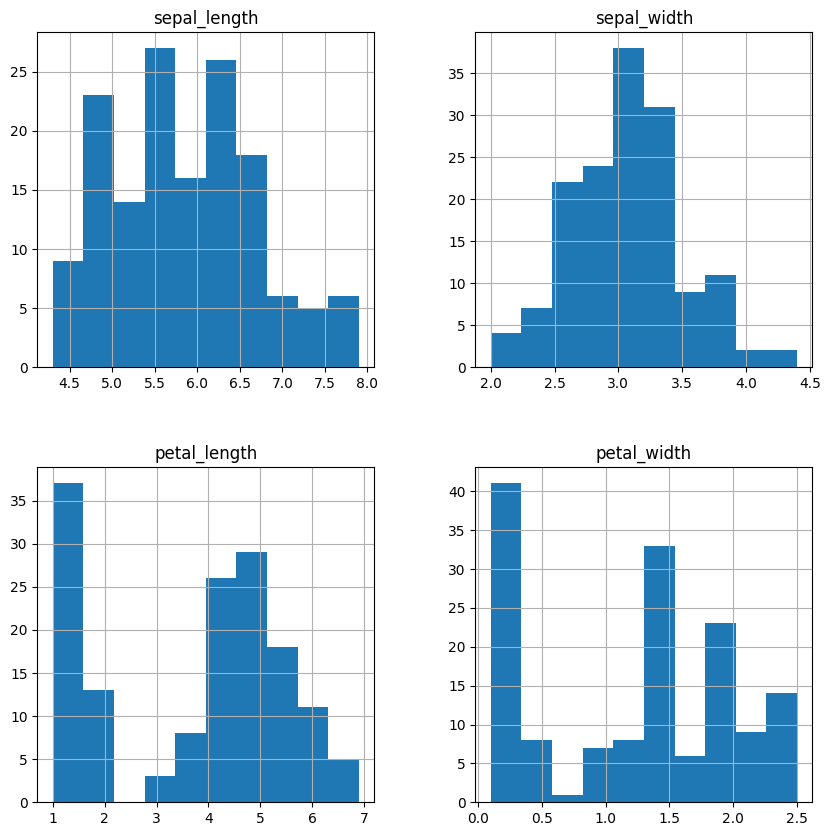

In [480]:
df.hist(figsize=(10,10))

In [481]:
df.shape

(150, 5)

#### Distribution of Sepal Width

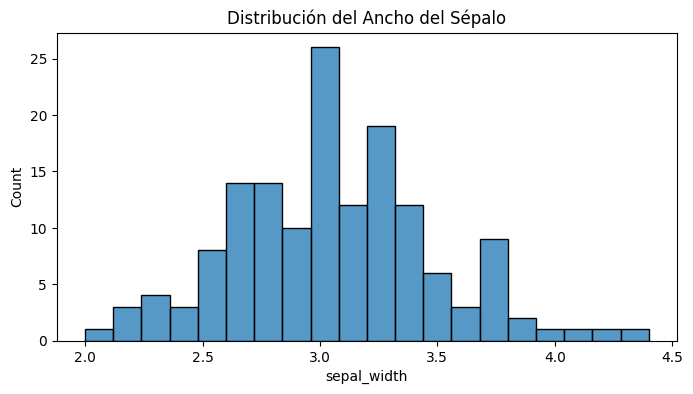

In [482]:
plt.figure(figsize=(8, 4))
sns.histplot(df['sepal_width'], bins=20)
plt.title('Distribución del Ancho del Sépalo')
plt.show()

#### Quantity of Each Specie

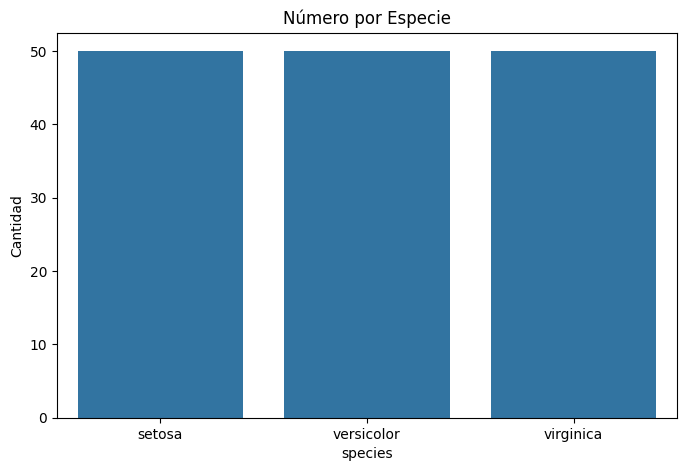

In [483]:
plt.figure(figsize=(8, 5))
sns.countplot(x='species', data=df)
plt.title('Número por Especie')
plt.ylabel('Cantidad')
plt.show()

#### Boxplot of the Petal Length

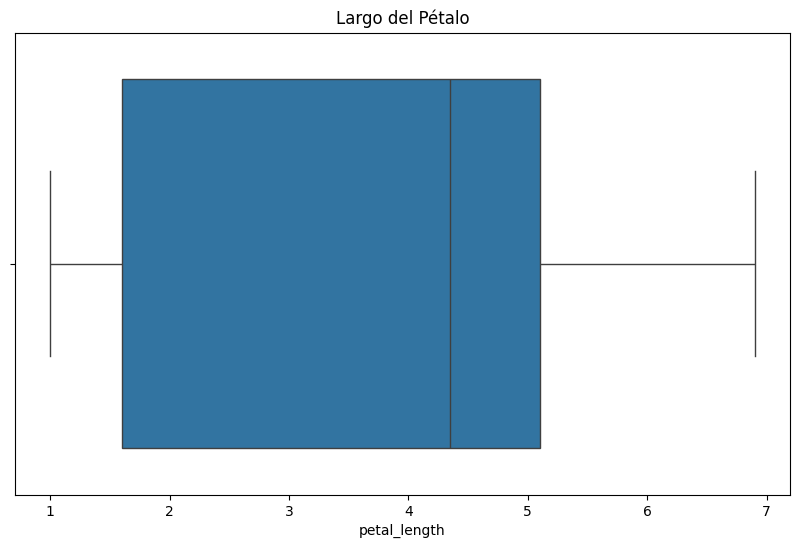

In [484]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['petal_length'])
plt.title('Largo del Pétalo')
plt.show()

#### Relationship between Length and Width

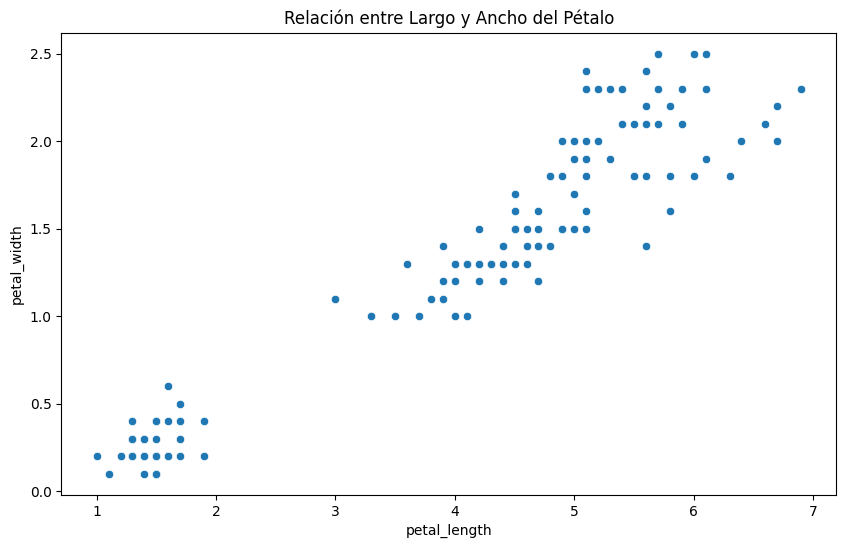

In [485]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal_length', y='petal_width', data=df)
plt.title('Relación entre Largo y Ancho del Pétalo')
plt.show()

#### Distribution of the petal length depending of the specie

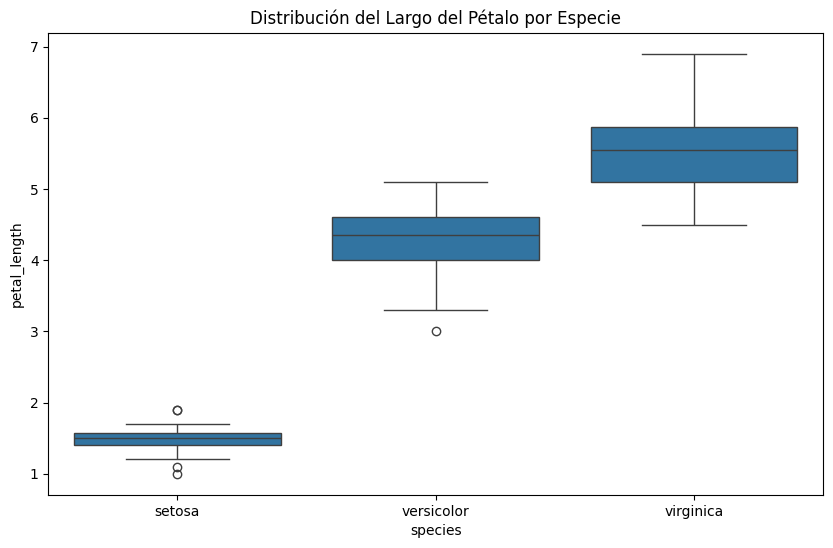

In [486]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Distribución del Largo del Pétalo por Especie')
plt.show()

#### Correlation between the petal values

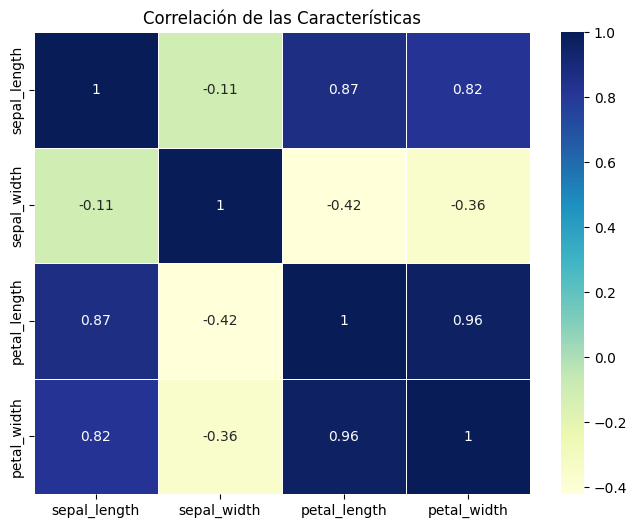

In [487]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlación de las Características')
plt.show()

# Data Cleaning (Looking if it is needed)

In [488]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

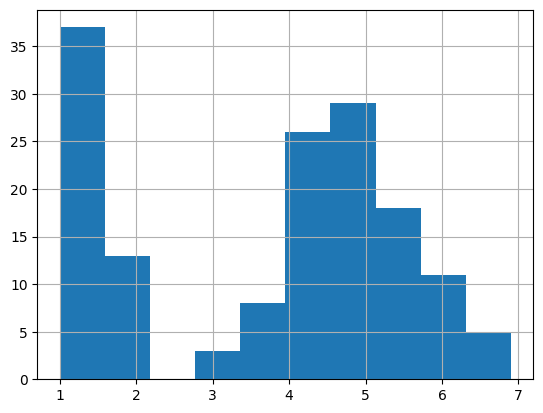

In [489]:
df["petal_length"].hist()

<Axes: >

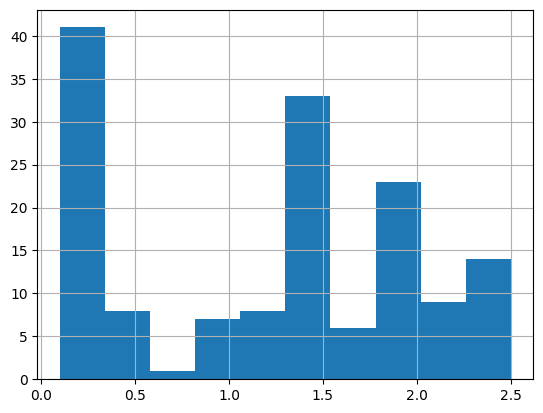

In [490]:
df["petal_width"].hist()

<Axes: >

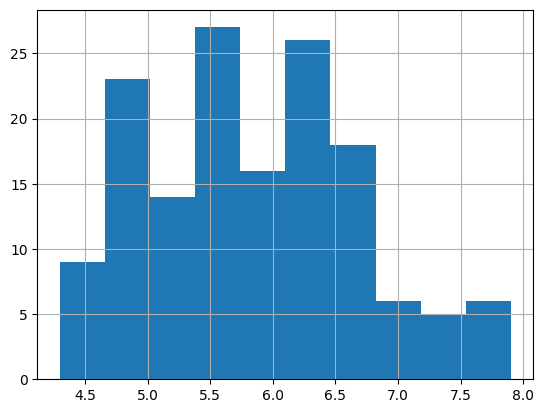

In [491]:
df["sepal_length"].hist()

<Axes: >

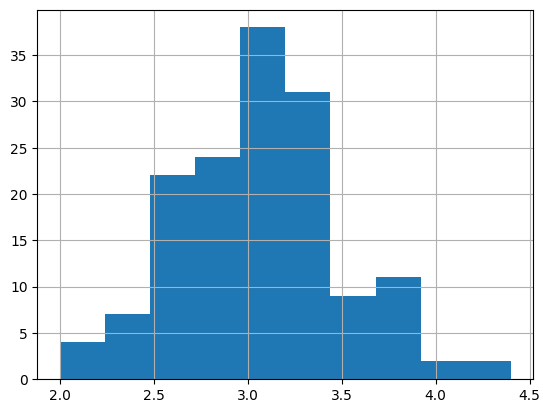

In [492]:
df["sepal_width"].hist()

# Data Transformation

In [493]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [494]:
df.loc[df["species"] == "setosa", "species"] = 0
df.loc[df["species"] == "versicolor", "species"] = 1
df.loc[df["species"] == "virginica", "species"] = 2
df["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [495]:
df.shape

(150, 5)

# Decision Tree Implementation

In [496]:
X = df.drop("species", axis=1)
y = df["species"]
y = y.astype(int)
#y.head()
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [497]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [498]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Evaluate Model with Train Data

In [499]:
y_pred = tree.predict(X_train)
accuracy_score(y_train, y_pred)

0.9714285714285714

<Axes: >

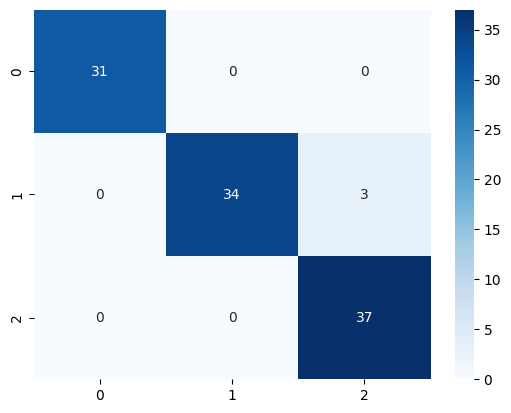

In [500]:
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, fmt="d", cmap="Blues")

#### Evaluate Model with Test Data

In [501]:
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

<Axes: >

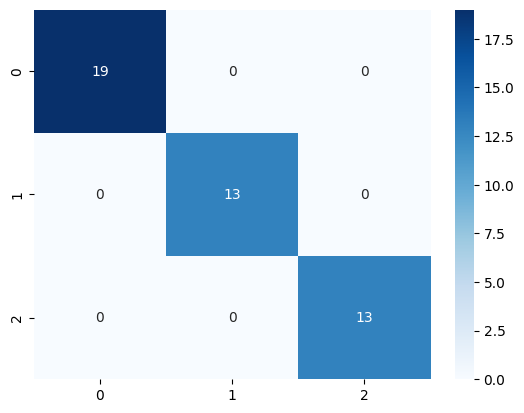

In [502]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues")

### Hyperparameter Tunning

In [503]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [2, 4, 6, 8, 9],
    "min_samples_split": [2, 3, 5, 10],
    "min_samples_leaf": [1,2,4,5],
    "criterion": ["gini", "entropy"]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid,
                           cv=5,
                           scoring="accuracy"
                           )

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_    

In [504]:
y_pred = best_tree.predict(X_train)

In [505]:
best_tree

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [506]:
accuracy_score(y_train, y_pred)

0.9523809523809523

<Axes: >

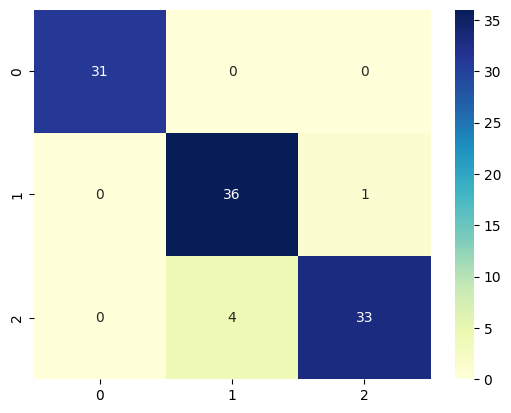

In [507]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot= True, fmt="d", cmap="YlGnBu")

In [508]:
y_pred = best_tree.predict(X_test)

In [509]:
accuracy_score(y_test, y_pred)

1.0

<Axes: >

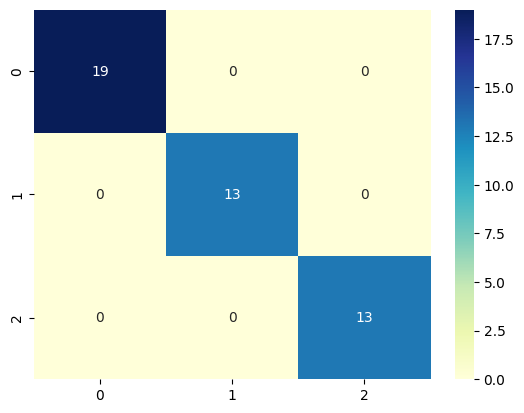

In [510]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt="d", cmap="YlGnBu")

### Feature Importance

In [511]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_tree.feature_importances_
}).sort_values(by= "Importance", ascending= False)
#best_tree.feature_importances_
importance_df

,Feature,Importance
2,petal_length,0.925813
3,petal_width,0.074187
1,sepal_width,0.000000
0,sepal_length,0.000000


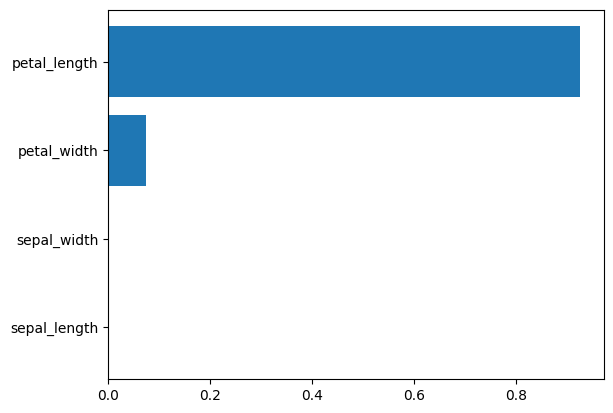

In [512]:
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()

In [513]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [514]:
X = df[["petal_length", "petal_width"]]
y = df["species"]
y = y.astype(int)

In [515]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [516]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [2, 4, 6, 8, 9],
    "min_samples_split": [2, 5, 10, 12, 14],
    "min_samples_leaf": [1,2,3,4],
    "criterion": ["gini", "entropy"]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid,
                           cv=5,
                           scoring="accuracy"
                           )

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

In [517]:
best_tree

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [518]:
y_pred = best_tree.predict(X_train)
accuracy_score(y_train, y_pred)

0.9714285714285714

In [519]:
y_pred = best_tree.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

<Axes: >

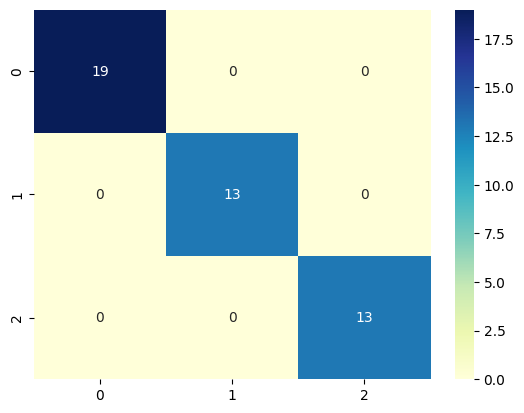

In [520]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt="d", cmap="YlGnBu")